# OpenScope's Illusion Dataset

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [25]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


### Downloading Ecephys Files

In [3]:
dandiset_id = "000248"
dandi_filepath = "sub-1171903426/sub-1171903426_ses-1181330601-acq-FINAL_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [4]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.58.0) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Showing Stim Templates

In [5]:
print(nwb.stimulus_template.keys())

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'sizeCI_presentations'])


In [6]:
stim_temp = "ICkcfg0_presentations"

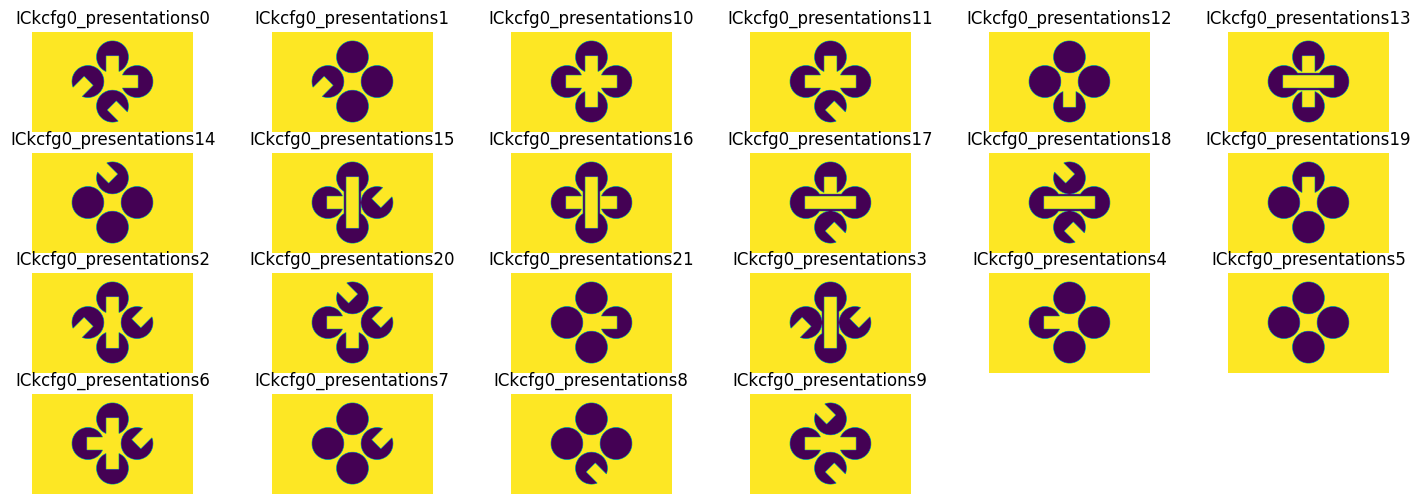

In [7]:
stim_template_imgs = nwb.stimulus_template[stim_temp].images

n_cols = 6
n_rows = len(stim_template_imgs) // n_cols
fig, axes = plt.subplots(n_rows+1, n_cols)
fig.set_size_inches(3*n_cols, 2*n_rows) # can tweak these if sizing/spacing needs improvement

if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for i, template_name in enumerate(stim_template_imgs):
    img = stim_template_imgs[template_name]
    
    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].imshow(img)

    axes[ax_row][ax_col].set_title(template_name)

for ax in axes.flat:
    ax.axis("off")

### Extracting and Selecting Stimulus Times


In [8]:
nwb.intervals.keys()

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'invalid_times', 'sizeCI_presentations', 'spontaneous_presentations'])

In [9]:
stim_table = nwb.intervals["ICkcfg0_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
0,5824.04856,5824.44889,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13484, 1, timestamps pynwb.base.TimeSeries a..."
1,5824.44889,5824.84923,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13485, 1, timestamps pynwb.base.TimeSeries a..."
2,5824.84923,5825.24957,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13486, 1, timestamps pynwb.base.TimeSeries a..."
3,5825.24957,5825.64991,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13487, 1, timestamps pynwb.base.TimeSeries a..."
4,5825.64991,5826.05025,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13488, 1, timestamps pynwb.base.TimeSeries a..."
5,5826.05025,5826.45058,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13489, 1, timestamps pynwb.base.TimeSeries a..."
6,5826.45058,5826.85092,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13490, 1, timestamps pynwb.base.TimeSeries a..."
7,5826.85092,5827.25125,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13491, 1, timestamps pynwb.base.TimeSeries a..."
8,5827.25125,5827.65159,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13492, 1, timestamps pynwb.base.TimeSeries a..."


In [36]:
print(np.mean(np.diff(stim_table.start_time)))
print(set(stim_table.frame))

0.40033645395213935
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0}


In [11]:
illusion_stim_select = lambda row: row.frame.item() == 10.0
illusion_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if illusion_stim_select(stim_table[i])]
print(len(illusion_stim_times))

control_stim_select = lambda row: row.frame.item() == 5.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(len(control_stim_times))

30
30


### Extracting and Selecting Units
Below, the `Units` table is retrived from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit.

In [12]:
units = nwb.units
units[:10]

,max_drift,spread,repolarization_slope,velocity_above,d_prime,nn_miss_rate,local_index,quality,waveform_halfwidth,snr,...,velocity_below,amplitude_cutoff,waveform_duration,PT_ratio,isolation_distance,amplitude,firing_rate,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,34.00,30.0,1.866277,0.000000,6.626220,0.000811,0,good,0.096147,4.860552,...,-1.000000,0.003285,0.178559,0.781018,78.114691,474.298695,3.197243,"[8.014794709919338, 8.293461076304402, 8.82879...","[0.00012949004762110477, 0.0001213092796695316...","[[0.0, 0.47657999999999645, 0.0772199999999962..."
19,40.17,60.0,1.107999,-0.412060,4.271249,0.009654,1,good,0.137353,2.764387,...,0.000000,0.500000,0.260972,0.532080,115.421707,246.130560,5.193174,"[50.997015060375595, 51.41301461210832, 51.757...","[0.00037993274566925847, 0.0003816832117861771...","[[0.0, 0.3112200000000027, -0.9989849999999991..."
20,24.25,110.0,1.209945,-0.057231,4.697081,0.001040,2,noise,0.178559,2.679727,...,-0.343384,0.500000,0.206030,0.445433,55.659774,268.688745,2.205221,"[4.837431467073574, 5.070397882703384, 5.38189...","[0.0002686896757199117, 0.00024659037033441513...","[[0.0, 0.8490299999999991, 0.6362850000000018,..."
21,11.10,70.0,1.542309,-0.274707,7.748337,0.000455,3,good,0.123618,4.091421,...,-0.343384,0.003494,0.192295,0.626257,102.377225,363.881895,3.091598,"[29.302205104647573, 29.363438371997976, 29.37...","[0.0004903548978179461, 0.0005185625567175445,...","[[0.0, -0.2427750000000014, -0.060255000000000..."
22,60.24,60.0,0.545493,-0.686767,3.683361,0.000417,4,good,0.178559,1.296938,...,-0.412060,0.014308,0.274707,0.339982,57.068266,238.263480,3.686589,"[4.8927647407816135, 4.986831306085279, 5.2071...","[0.0003544778954586829, 0.00028605818602693036...","[[0.0, 1.3367249999999982, 2.632305000000001, ..."
23,11.91,80.0,0.782181,-1.854271,5.929191,0.005763,5,good,0.109883,2.165281,...,0.206030,0.081811,0.192295,0.396397,144.017711,191.899305,40.079020,"[4.831464806836382, 4.8549647815135915, 4.8768...","[0.00016099845728550894, 0.0001640536935487669...","[[0.0, -0.2702700000000058, -0.877695000000002..."
24,34.87,30.0,0.895949,0.686767,4.833647,0.001395,6,good,0.109883,2.582031,...,0.000000,0.159102,0.192295,0.290704,71.934167,221.174850,8.153243,"[6.543396295449309, 6.747162742544032, 8.00679...","[0.00017716837002965157, 0.0002089591151967821...","[[0.0, -1.0297949999999982, -1.565069999999996..."
25,12.01,30.0,2.312019,0.000000,10.664306,0.000100,7,good,0.096147,5.079402,...,-1.000000,0.000069,0.192295,0.474435,191.051997,559.839540,0.424026,"[5.1960977472533925, 6.767129387695306, 7.3390...","[0.00037884489401791946, 0.0003530067131735268...","[[0.0, 0.14449500000000115, -0.829334999999998..."
26,21.36,70.0,0.950412,-0.412060,5.617911,0.002301,8,good,0.137353,2.380758,...,-0.274707,0.137771,0.288442,0.532951,129.795609,217.471995,24.930633,"[4.798231509314145, 4.812964826771346, 4.83006...","[0.0003202943462333242, 0.00031075076914757846...","[[0.0, 0.7388550000000004, 1.0032750000000001,..."


In [62]:
# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'MB', 'POST', 'LP', 'MGd', 'VISam6b', 'ENTm5', 'PPT', 'NOT', 'VISrl5', 'DG-po', 'DG-sg', 'VISam2/3', 'SCig', 'VISal4', 'VISpm6a', 'VISam6a', 'VISam4', 'VISrl4', 'ProS', 'VISp6a', 'PoT', 'ENTm2', 'DG-mo', 'VISpm2/3', 'ENTm3', 'VISrl6a', 'VISp5', 'VISrl1', 'SUB', 'HPF', 'MGm', 'VISal5', 'SGN', 'PAR', 'VISp4', 'VISp6b', 'VISal2/3', 'VISp2/3', 'VISal6a', 'VISrl2/3', 'VISpm5', 'VISpm4', 'VISal6b', 'ENTm6', 'CA3', 'POL', 'VISam5', 'APN', 'CA1'}


In [64]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

142


### Generating Spike Matrix

In [89]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [90]:
def get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution):
    n_units = len(units_spike_times)
    n_trials = len(stim_times)

    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((n_units, n_trials, len(bin_edges)))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(n_units):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [91]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

illusion_spike_matrix = get_spike_matrix(units_spike_times, illusion_stim_times, bin_edges, time_resolution)
control_spike_matrix = get_spike_matrix(units_spike_times, control_stim_times, bin_edges, time_resolution)

print(illusion_spike_matrix.shape)
print(control_spike_matrix.shape)

(142, 30, 150)
(142, 30, 150)


### Showing Response Windows

In [92]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        fig.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [93]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


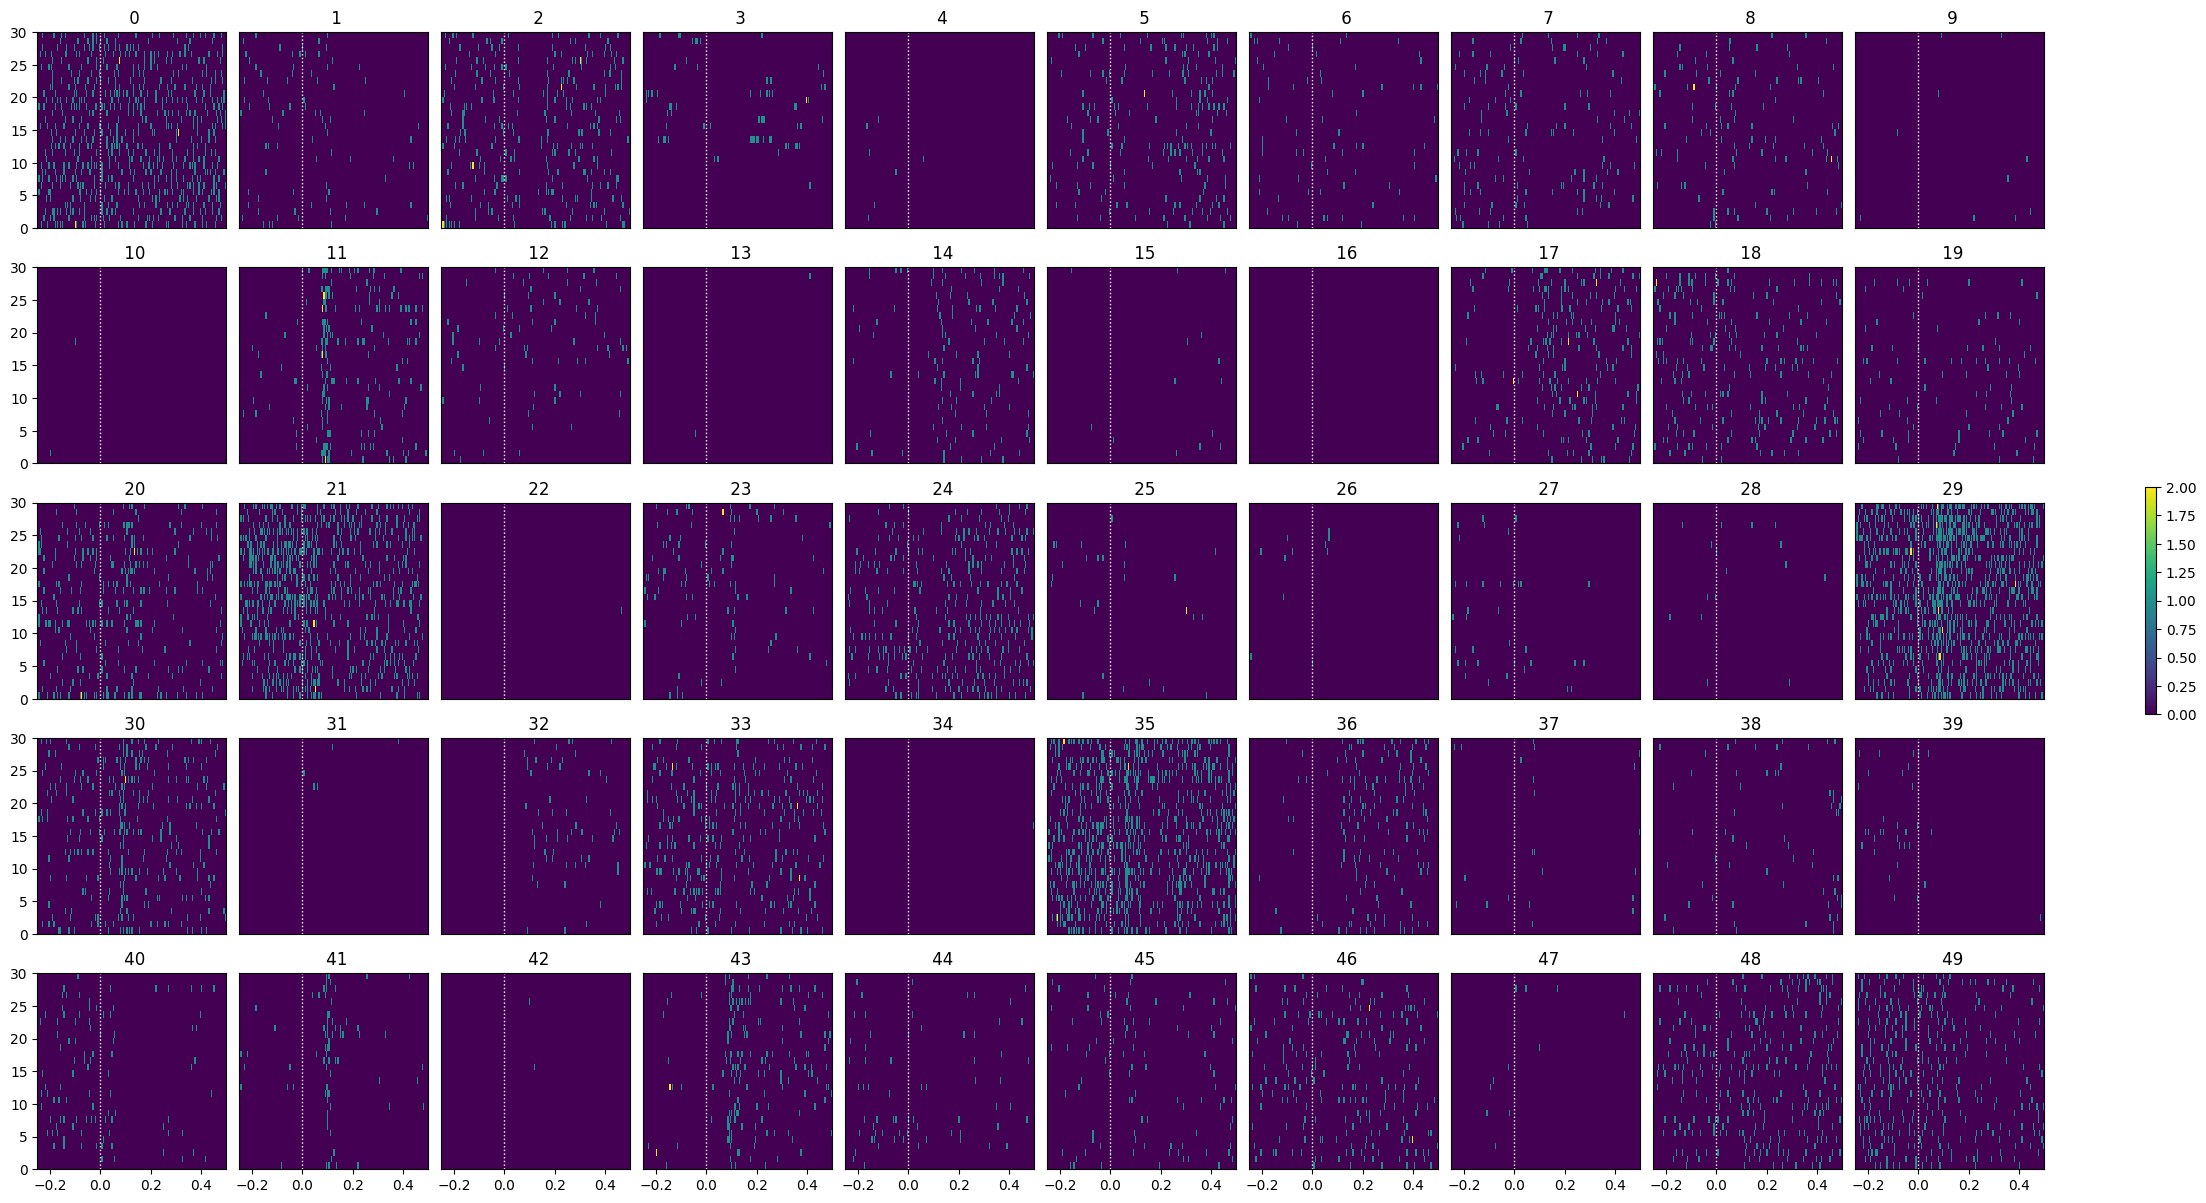

In [94]:
show_many_responses(illusion_spike_matrix, 5, 10)

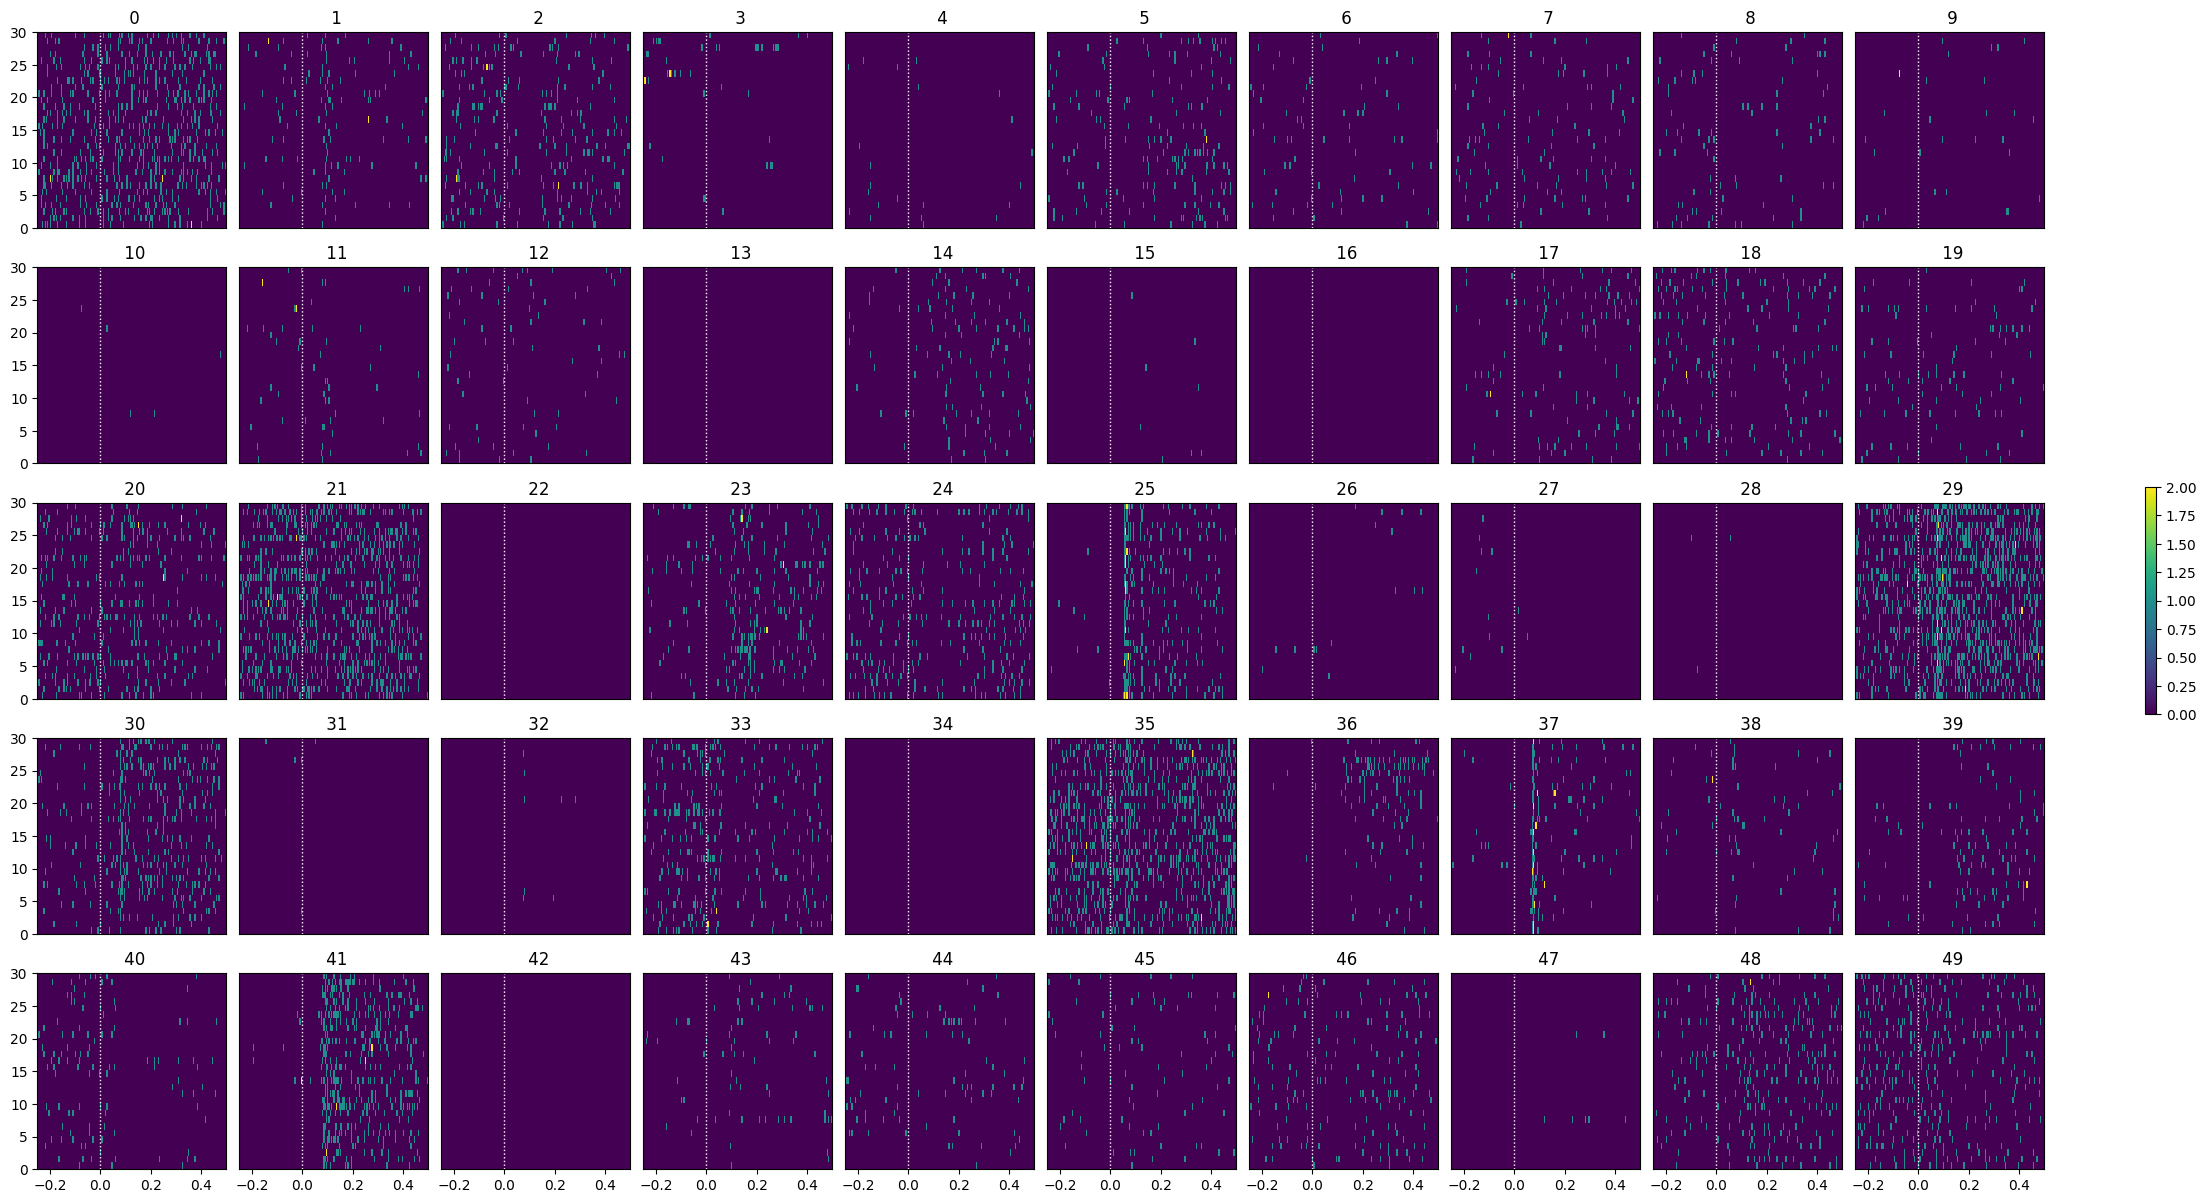

In [95]:
show_many_responses(control_spike_matrix, 5, 10)

### Selecting Responsive Cells

In [127]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(unit_z_scores > 2)[0]

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_20784\32033853.py:9: RuntimeWarning: divide by zero encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
C:\Users\carter.peene\AppData\Local\Temp\ipykernel_20784\32033853.py:9: RuntimeWarning: invalid value encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means


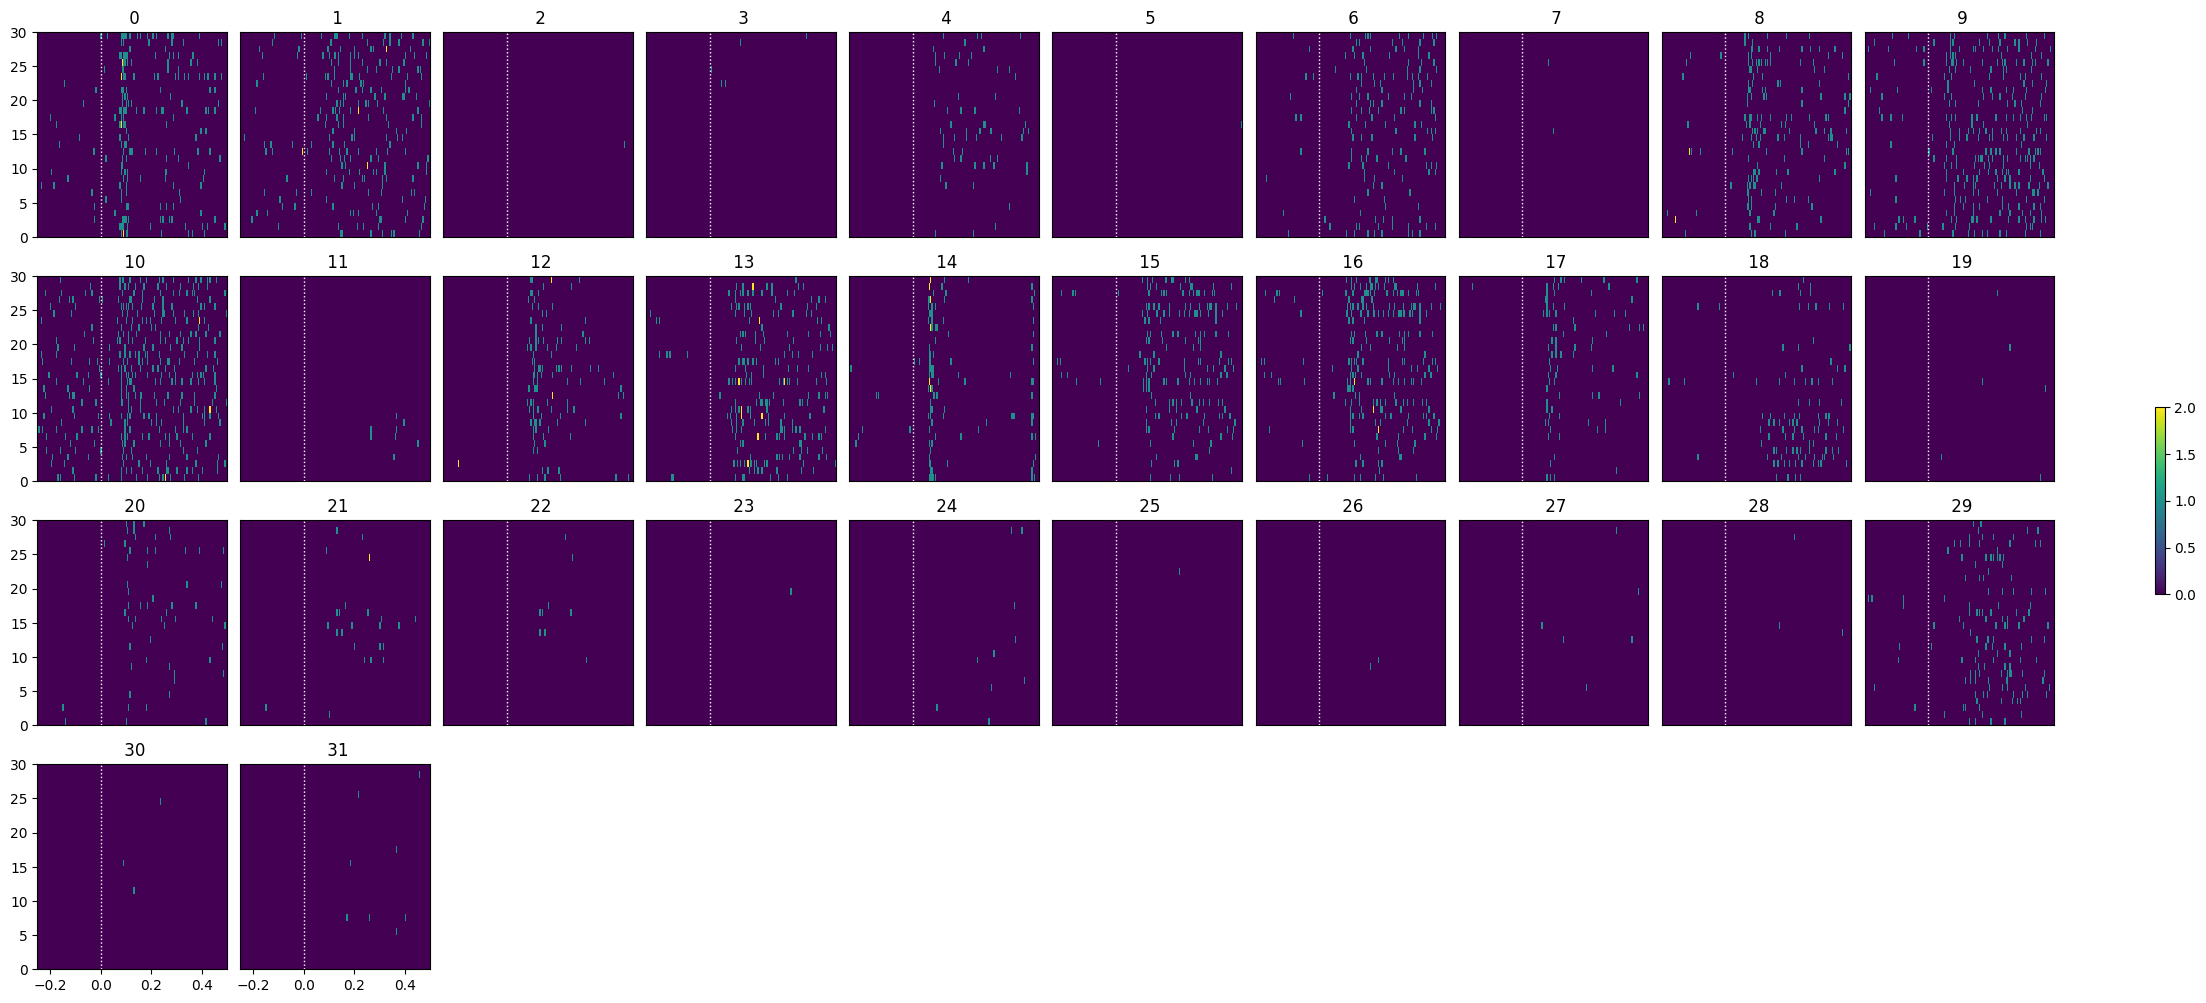

In [128]:
illusion_selected_idxs = select_cells(illusion_spike_matrix, stimulus_onset_idx)
show_many_responses(illusion_spike_matrix[illusion_selected_idxs], 5, 10)

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_20784\32033853.py:9: RuntimeWarning: divide by zero encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
C:\Users\carter.peene\AppData\Local\Temp\ipykernel_20784\32033853.py:9: RuntimeWarning: invalid value encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means


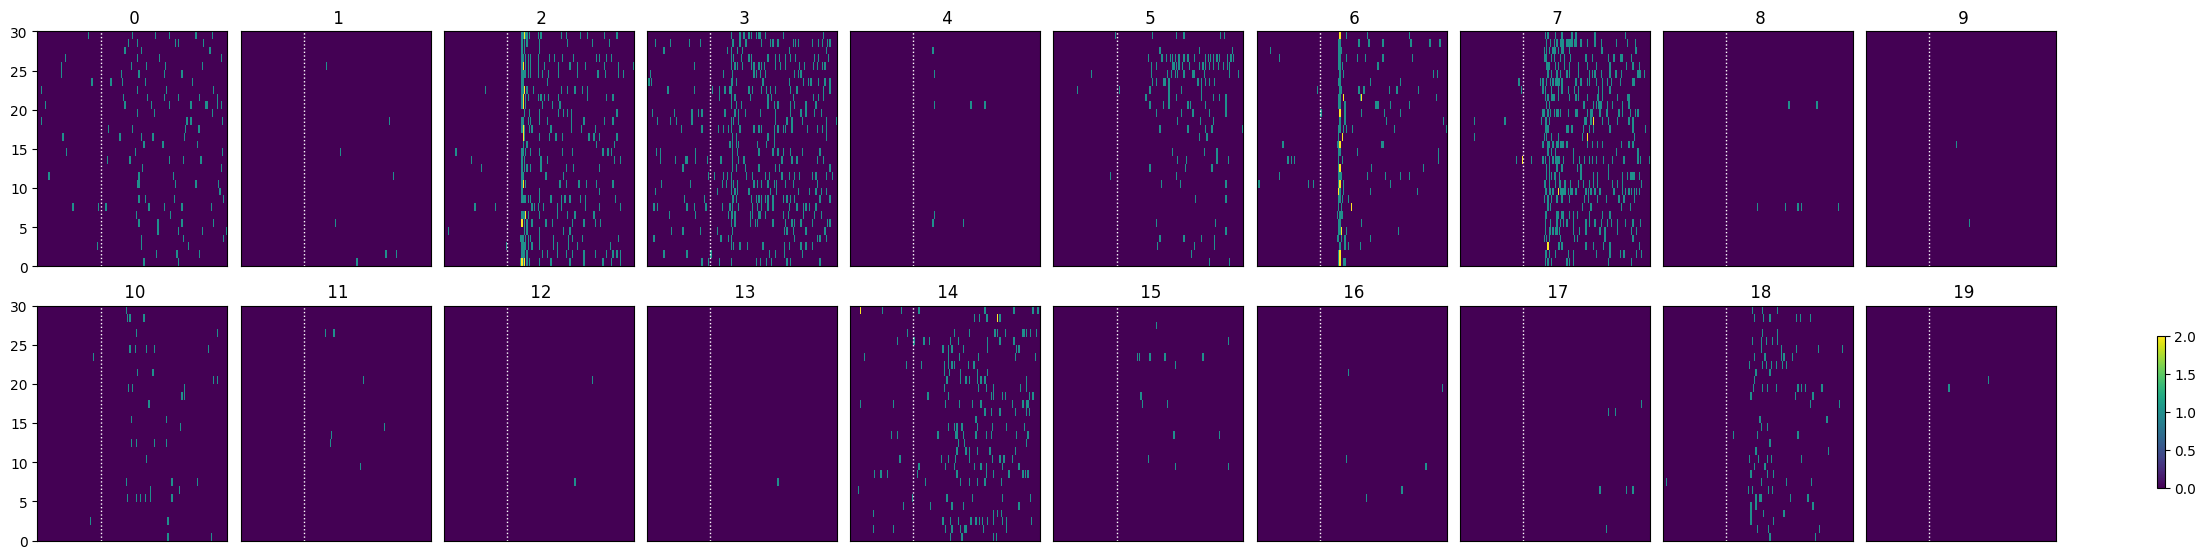

In [129]:
control_selected_idxs = select_cells(control_spike_matrix, stimulus_onset_idx)
show_many_responses(control_spike_matrix[control_selected_idxs], 5, 10)

### Getting Receptive Fields

In [138]:
rf_stim_table = nwb.intervals["RFCI_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,stimulus_index,temporal_frequency,Mask,orientation,x_position,y_position,color,contrast,opacity,phase,sf,size,units,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,6384.56968,6384.81986,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14865, 1, timestamps pynwb.base.TimeSeries a..."
1,6384.81986,6385.07007,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14866, 1, timestamps pynwb.base.TimeSeries a..."
2,6385.07007,6385.32029,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14867, 1, timestamps pynwb.base.TimeSeries a..."
3,6385.32029,6385.58720,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14868, 1, timestamps pynwb.base.TimeSeries a..."
4,6385.58720,6385.83738,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14869, 1, timestamps pynwb.base.TimeSeries a..."
5,6385.83738,6386.08760,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14870, 1, timestamps pynwb.base.TimeSeries a..."
6,6386.08760,6386.33781,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14871, 1, timestamps pynwb.base.TimeSeries a..."
7,6386.33781,6386.58802,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14872, 1, timestamps pynwb.base.TimeSeries a..."
8,6386.58802,6386.83824,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,143.810387,-143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14873, 1, timestamps pynwb.base.TimeSeries a..."


In [139]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
pix


In [140]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [141]:
### compute receptive fields for each unit in selected units

illusion_rfs = []
for idx in illusion_selected_idxs:
    these_spike_times = units_spike_times[idx]
    illusion_rfs.append(get_rf(these_spike_times))

control_rfs = []
for idx in control_selected_idxs:
    these_spike_times = units_spike_times[idx]
    control_rfs.append(get_rf(these_spike_times))

In [145]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs):
    n_rows = len(rfs)//10
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= 10 rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]

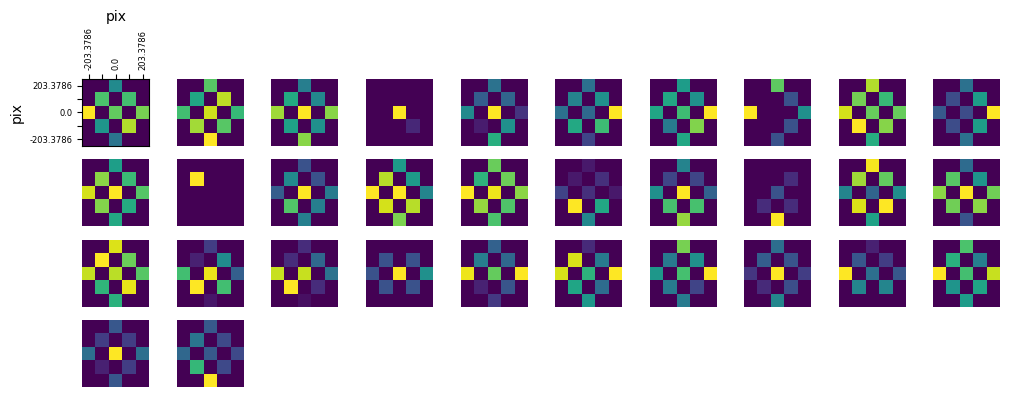

In [146]:
display_rfs(illusion_rfs)

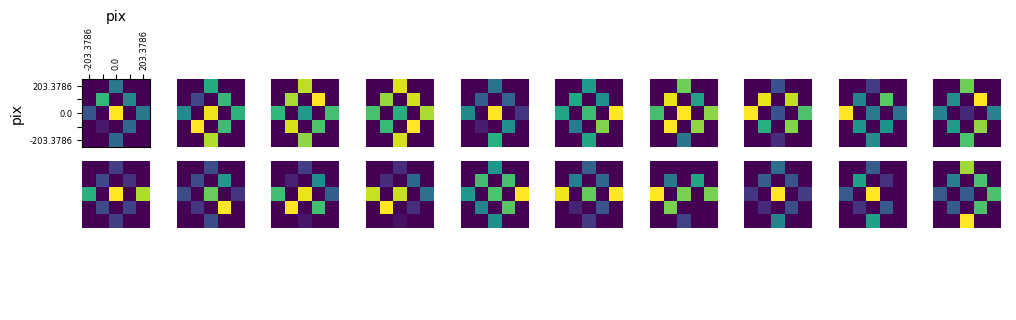

In [147]:
display_rfs(control_rfs)